In [27]:
import networkx as nx
from karateclub import Graph2Vec
import matplotlib.pyplot as plt

import os
from pathlib import Path
import matplotlib.pyplot as plt

DATAPATH = os.path.join("..", "mydata", "trace_head.csv")
RESULTFOLDER = os.path.join("..", "results", "graph2vec")
Path(RESULTFOLDER).mkdir(parents = True, exist_ok = True)

### Construct graphs with NetworkX - [link](https://networkx.org/documentation/stable/tutorial.html)

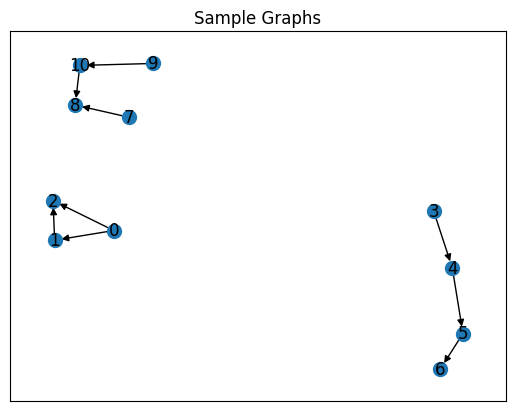

In [81]:
# init graph data
v = [i for i in range(0)]
e = [(0, 1), (1, 2), (0, 2), (3, 4), (4, 5), (5, 6), (7, 8), (9, 10),  (10, 8)]

# construct nx graph
g = nx.DiGraph()
# g.add_nodes_from(v)
g.add_edges_from(e)

# plot
plt.figure()
plt.title("Sample Graphs")
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 2,
    'font_size': 10,
    'linewidths': 0.1
}
nx.draw_networkx(g, with_labels=True, node_size=100)
# nx.draw_networkx(g, **options)
plt.savefig(os.path.join(RESULTFOLDER, "sample_graphs.png"))


/var/folders/j6/9k31sj9141gg70xcsghvbzph0000gn/T/ipykernel_86791/2517656581.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sub1 = plt.subplot(131)


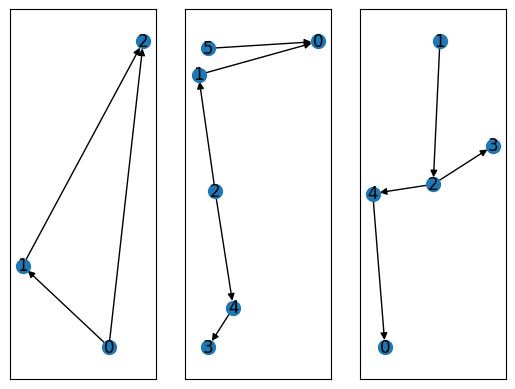

In [83]:

# Generate sample graphs (replace this with your actual graph dataset)
graphs = [
    nx.generators.erdos_renyi_graph(10, 0.5),
    nx.generators.watts_strogatz_graph(10, 5, 0.3),
    nx.generators.barabasi_albert_graph(10, 2),
]

# sample graph array
e1 = [(0, 1), (1, 2), (0, 2)]
e2 = [(1, 0), (2, 1), (2, 4), (4, 3), (5, 0)]
e3 = [(1, 2), (2, 3), (2,4), (4, 0)]
graphs = [nx.DiGraph(edgelist) for edgelist in [e1, e2, e3]]

# plot
plt.figure()
plt.title("Sample Graphs")
sub1 = plt.subplot(131)
nx.draw_networkx(graphs[0], node_size=100)
sub2 = plt.subplot(132)
nx.draw_networkx(graphs[1], node_size=100)
sub3 = plt.subplot(133)
nx.draw_networkx(graphs[2], with_labels=True, node_size=100)
plt.savefig(os.path.join(RESULTFOLDER, "random_graphs.png"))


In [87]:
graphs[2].nodes()

NodeView((1, 2, 3, 4, 0))

### Parameters of the Graph2Vec API - [link](https://karateclub.readthedocs.io/en/latest/_modules/karateclub/graph_embedding/graph2vec.html)
`dimensions` (int, optional): The size of the output embedding vector. The default value is 128. To change the size of the embedding vector, set this parameter to the desired size when initializing the Graph2Vec object.

`wl_iterations` (int, optional): The number of Weisfeiler-Lehman iterations to perform. This parameter influences the complexity of the captured structural information in the graph embeddings. The default value is 2.

`min_count` (int, optional): The minimum count of substructures required to be included in the vocabulary. This parameter helps to filter out rare substructures from the embeddings. The default value is 5.

`epochs` (int, optional): The number of training epochs for the Skip-Gram model used to learn the embeddings. Increasing the number of epochs can improve the quality of the embeddings but may also increase the training time. The default value is 10.

In [88]:
# Initialize Graph2Vec with default parameters
graph2vec = Graph2Vec(dimensions=20, wl_iterations=2, min_count=5, epochs=10)

# Fit the model to the dataset
graph2vec.fit(gs)

# Get the graph embeddings
embeddings = graph2vec.get_embedding()

print(embeddings)
with open('graph2vec_trial.log', 'a+') as f:
    f.write('embedding: \n{}'.format(embeddings))
    # f.write('embedding shape: {len(embeddings)}x{}\n{}'.format(len(emb), len(emb[0]), emb))



[[ 0.0399373   0.046815    0.03990886 -0.03831448 -0.0424194  -0.02263558
  -0.0214088   0.0230174  -0.03331656 -0.04226951 -0.02311289  0.04854745
  -0.02329098  0.00749571  0.04395961  0.02165974 -0.00485745  0.04664924
  -0.02973321  0.02763554]
 [ 0.02016534 -0.01758921 -0.00466153 -0.04403187  0.00025954 -0.01327065
   0.04955709 -0.0235951  -0.03378649  0.00561161 -0.03909088 -0.03982383
  -0.03278202 -0.03048195 -0.02173655 -0.00981576 -0.01241552  0.02883912
   0.03416676 -0.02267256]
 [-0.0317165   0.00390095 -0.02254527  0.00012918  0.03588209  0.01942183
  -0.02705274 -0.00641488  0.00091473 -0.04041258  0.04930863  0.04157768
  -0.00014912  0.02925001  0.02253228  0.04330461  0.01825211 -0.04640336
  -0.01225782  0.01793828]]


In [89]:
embeddings.shape

(3, 20)